In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [210]:
df=pd.read_csv('E:\McDonalds Case Study-20240429T100949Z-001\McDonalds Case Study\mcdonalds.csv')

In [211]:
df.sample(6)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
271,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+3,32,Once a month,Male
1160,No,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,No,+1,60,Every three months,Female
1111,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,+2,61,Every three months,Female
299,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,No,I love it!+5,37,More than once a week,Male
544,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,+1,26,Once a month,Male
112,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,63,Every three months,Male


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [213]:
df.describe(include= 'all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [214]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [215]:
columns=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']

In [216]:
for i in columns:
    df[i]=df[i].map({'Yes': 1, 'No': 0})

In [217]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(12), object(3)
memory usage: 170.4+ KB


In [219]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [220]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [221]:
#df[df.duplicated()].sum()

In [222]:
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

In [223]:
df[columns].mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [224]:
b=df.groupby('Gender')[columns]
b.mean()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
Gender,,,,,,,,,,,
Female,0.581218,0.918782,0.079949,0.885787,0.516497,0.913706,0.651015,0.663706,0.294416,0.214467,0.215736
Male,0.518797,0.894737,0.109774,0.845113,0.538346,0.884211,0.536842,0.621053,0.433083,0.180451,0.275188


In [225]:
df[columns].corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


In [226]:
#sns.pairplot(df[columns]);

In [227]:
X=df.iloc[:,0:11]
Y=df['Like']

In [228]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488


In [229]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00068871  0.25398155  0.00874825 -0.0870868  -0.151958    0.10690964
   0.10510857  0.68775299 -0.06176913  0.24735362 -0.42014077]
 [ 0.25398155  1.00068871  0.02894783  0.03647621 -0.10702122  0.24322928
   0.15167832  0.28995424 -0.1640743   0.09929843 -0.34103165]
 [ 0.00874825  0.02894783  1.00068871 -0.04135057  0.05396918  0.02028953
   0.01721439  0.06119592  0.046011    0.10632502  0.03285645]
 [-0.0870868   0.03647621 -0.04135057  1.00068871  0.31950312  0.04563131
  -0.02665823 -0.08762105  0.08919511 -0.33863448  0.14615508]
 [-0.151958   -0.10702122  0.05396918  0.31950312  1.00068871 -0.05825258
  -0.07331485 -0.16364895  0.14738402 -0.21133174  0.32210106]
 [ 0.10690964  0.24322928  0.02028953  0.04563131 -0.05825258  1.00068871
   0.25230713  0.14593635 -0.20183306  0.03361931 -0.13808804]
 [ 0.10510857  0.15167832  0.01721439 -0.02665823 -0.07331485  0.25230713
   1.00068871  0.13958061 -0.72208951  0.13009301 -0.12568868]
 [ 0.68775299  0.28995424  0.06119592 -0.

In [230]:
pca = PCA(n_components=11)
pca.fit(XScaled)

PCA(n_components=11)

In [231]:
print(pca.explained_variance_)

[2.81316617 1.6329477  1.38111047 1.08171127 0.91895162 0.78253978
 0.71533376 0.59270042 0.52426978 0.3078135  0.25703129]


In [232]:
print(pca.components_)

[[-0.40695508 -0.30882741 -0.02332033  0.17786071  0.26779582 -0.21303906
  -0.28913434 -0.42611499  0.29094445 -0.26683857  0.41074387]
 [ 0.28261487 -0.04568172  0.0699822  -0.20559024 -0.13630029 -0.28244059
  -0.57503178  0.24219851  0.56752776  0.20103082 -0.14388846]
 [-0.25958798 -0.31715142  0.0201696  -0.60807736 -0.38956798 -0.21139458
   0.1251574  -0.26964779 -0.18329788  0.36781371  0.09029919]
 [ 0.02623694 -0.00942396  0.84549641 -0.02339555  0.33085439  0.09036315
   0.11447698  0.0726908   0.03550987  0.30198954  0.23523093]
 [ 0.34685741 -0.43714795 -0.185551    0.08693385  0.3437128  -0.56893862
   0.25698101  0.2860986  -0.20736179  0.05178742  0.10584327]
 [-0.12491568  0.18896641  0.43866119  0.1075199  -0.27832865 -0.57273434
   0.02065707 -0.05305267 -0.17116009 -0.4461664  -0.32804054]
 [ 0.15987822 -0.66181418  0.21418844 -0.0238514  -0.30729985  0.39243636
  -0.00889462  0.19736396  0.01519838 -0.44944615 -0.01707024]
 [ 0.01658651  0.15003253 -0.02783532 -0.

In [233]:
print(pca.explained_variance_ratio_)

[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]


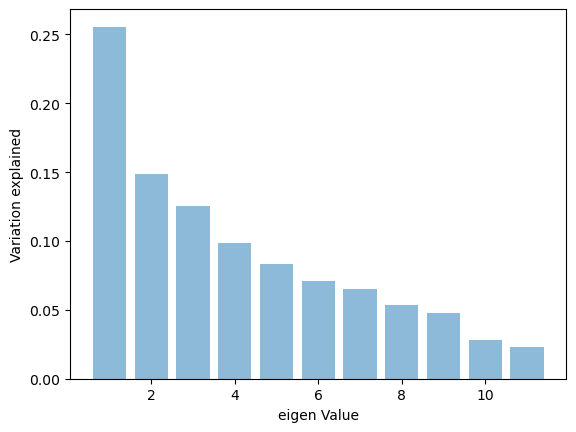

In [234]:
plt.bar(list(range(1,12)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

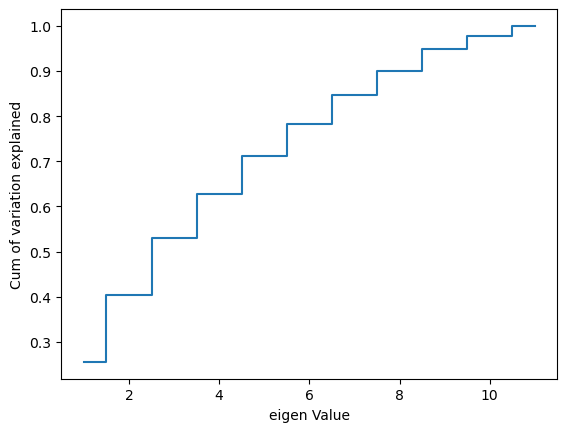

In [235]:
plt.step(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [236]:
pca2 = PCA(n_components=2)
pca2.fit(XScaled)
print(pca2.components_)
print(pca2.explained_variance_ratio_)


[[-0.40695508 -0.30882741 -0.02332033  0.17786071  0.26779582 -0.21303906
  -0.28913434 -0.42611499  0.29094445 -0.26683857  0.41074387]
 [ 0.28261487 -0.04568172  0.0699822  -0.20559024 -0.13630029 -0.28244059
  -0.57503178  0.24219851  0.56752776  0.20103082 -0.14388846]]
[0.25556637 0.14834762]


In [237]:
Xpca = pca2.transform(XScaled)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


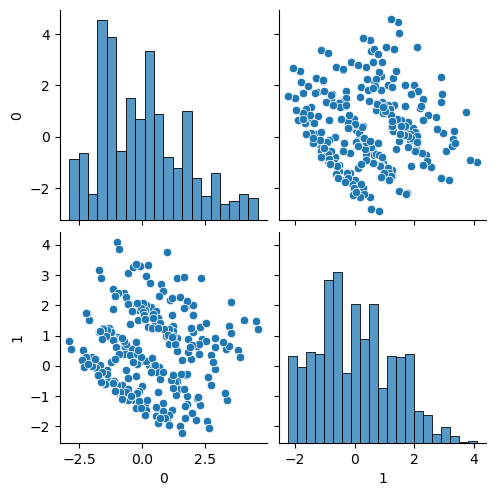

In [239]:
sns.pairplot(pd.DataFrame(Xpca))

In [240]:
from scipy.spatial.distance import cdist
clusters=range(2,17)
wss=[]


In [241]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(Xpca)
    wss.append(KM.inertia_)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_k

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

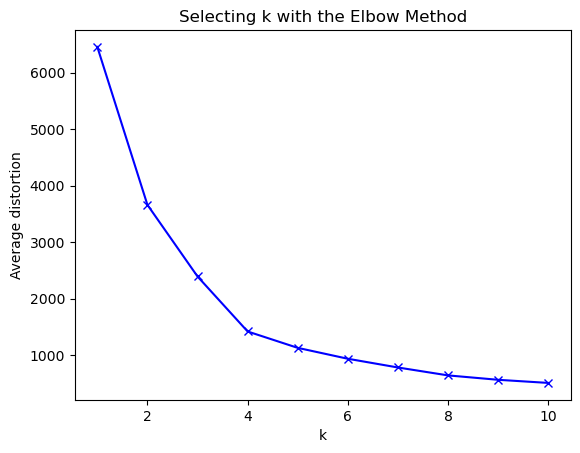

In [242]:
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [244]:
final_model=KMeans(4)
final_model.fit(Xpca)

labels = final_model.labels_


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [245]:
df['labels']= labels

In [246]:
df.sample(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,labels
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,3
1212,0,1,0,1,1,1,0,0,1,0,1,-2,28,Once a year,Female,1
1111,0,1,0,1,1,1,1,0,0,0,0,+2,61,Every three months,Female,3
625,0,1,0,1,1,1,0,1,1,0,0,+1,66,Once a month,Female,2
807,0,1,1,1,1,1,1,1,0,0,0,-3,62,Once a year,Male,3


In [247]:
df['labels'].value_counts()

labels
0    588
3    348
2    327
1    190
Name: count, dtype: int64